# Data cleaning
---

***Our mission in this part is to***
1. Import the data
2. Parse the date and trading timings consistently
3. Treat for missing data
4. Store the 'clean' data in the `interim` folder of `data`

## 1. Import the data

A rudimentary observation of the raw data shows the following:
1. The first column of the raw data denotes C for the rows that contains comments necessary for the viewers to understand what this data is for, H for headers and D for transactions.
2. There are a lot of missing data, especially for the columns for subsequent segments of power generation as most of the generators extinguish their offers within the first few segments beyond which electricity generation is not viable.

Let's check whether one of the raw data is imported without any issue.

In [1]:
#Importing pandas
import pandas as pd

Maybe not evident, but those extra rows with `C`, `H` and `D` might cause some problems while extracting the data. So, the safest way to resolve this is to omit them. The first column contains these letters whereas the first 4 rows gives the data desrciption, which are not required. To make things quicker, it is best to run a single code that treats all of the raw data since their composition is similar.

In [2]:
#Importing package `os`; useful for file path extraction
import os

#Extract the file names of the required datasets
da_file_name = os.listdir("../data/raw/da")[1:6]       #They are lists in nature
rt_file_name = os.listdir("../data/raw/rt")[1:6]

#Combine the dataset names into one list
all_file_name = da_file_name + rt_file_name

#Creating a dictionary that would go on to store the dataset
data_dict = {}

for file in all_file_name:

    #Determining the market type
    market_type = "da" if "da" in file.lower() else "rt"

    #Extracting date portion (dates are contained in YYYYMMDD format at the right of the last underscore) and omitting ".csv"
    date_portion = file.split("_")[-1].replace(".csv","")

    #Generating full file path
    project_root = os.path.dirname(os.getcwd())
    file_path = os.path.join(project_root, "data", "raw", market_type, file)

    #Creating a variable key
    var_name = f"data_{market_type}_{date_portion}"

    #Reading the file
    df = pd.read_csv(file_path, skiprows=4).iloc[1:, 1:]
    df = df.iloc[:-1, :] 

    #Storing it in dictionary
    data_dict[var_name] = df

#Checking whether our datasets have been loaded correctly
data_dict["data_rt_20250627"].tail(5)

,Day,Trading Interval,Masked Lead Participant ID,Masked Asset ID,Must Take Energy,Maximum Daily Energy Available,Economic Maximum,Economic Minimum,Cold Startup Price,Intermediate Startup Price,...,Segment 8 Price,Segment 8 MW,Segment 9 Price,Segment 9 MW,Segment 10 Price,Segment 10 MW,Claim 10,Claim 30,Unit Status,Max Daily Award Limit
10388,06/27/2025,20,989046,42750,0,0.000,1.000,0.100,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,MUST_RUN,NaN
10389,06/27/2025,21,989046,42750,0,0.000,1.000,0.100,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,MUST_RUN,NaN
10390,06/27/2025,22,989046,42750,0,0.000,0.000,0.000,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,MUST_RUN,NaN
10391,06/27/2025,23,989046,42750,0,0.000,0.000,0.000,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,MUST_RUN,NaN
10392,06/27/2025,24,989046,42750,0,0.000,0.000,0.000,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,MUST_RUN,NaN


In [3]:
#To make things easier, we create a function that extracts the required data by putting the date in YYYYMMDD format and the market type
def get_data(date:str, market:str, data):
    key = f"data_{market}_{date}"
    return data.get(key, None)

In [4]:
#Checking whether the function works
get_data("20250627","da",data_dict)

,Day,Trading Interval,Masked Lead Participant ID,Masked Asset ID,Must Take Energy,Maximum Daily Energy Available,Economic Maximum,Economic Minimum,Cold Startup Price,Intermediate Startup Price,...,Segment 8 Price,Segment 8 MW,Segment 9 Price,Segment 9 MW,Segment 10 Price,Segment 10 MW,Claim 10,Claim 30,Unit Status,Max Daily Award Limit
1,06/27/2025,01,20721,88115,0,0.000,3.000,0.100,3.10,3.10,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,ECONOMIC,0.000
2,06/27/2025,02,20721,88115,0,0.000,3.000,0.100,3.10,3.10,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,ECONOMIC,0.000
3,06/27/2025,03,20721,88115,0,0.000,3.000,0.100,3.10,3.10,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,ECONOMIC,0.000
4,06/27/2025,04,20721,88115,0,0.000,3.000,0.100,3.10,3.10,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,ECONOMIC,0.000
5,06/27/2025,05,20721,88115,0,0.000,3.000,0.100,3.10,3.10,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,ECONOMIC,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8780,06/27/2025,20,989046,42750,0,0.000,1.000,0.100,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,MUST_RUN,0.000
8781,06/27/2025,21,989046,42750,0,0.000,1.000,0.100,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,MUST_RUN,0.000
8782,06/27/2025,22,989046,42750,0,0.000,0.000,0.000,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,MUST_RUN,0.000
8783,06/27/2025,23,989046,42750,0,0.000,0.000,0.000,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,MUST_RUN,0.000


## 2. Parsing the dates and trade timings

Checking the nature of `Day` and `Trading Interval`

In [5]:
for name, df in data_dict.items():
    # safety: ensure the columns exist
    if "Day" in df.columns and "Trading Interval" in df.columns:
        print(name)
        print(" Day dtype:", df["Day"].dtype)
        print(" Trading Interval dtype:", df["Trading Interval"].dtype)
        print("---")
    else:
        print(name, ": missing Day or Trading Interval column")

data_da_20250625
 Day dtype: object
 Trading Interval dtype: object
---
data_da_20250626
 Day dtype: object
 Trading Interval dtype: object
---
data_da_20250627
 Day dtype: object
 Trading Interval dtype: object
---
data_da_20250628
 Day dtype: object
 Trading Interval dtype: object
---
data_da_20250629
 Day dtype: object
 Trading Interval dtype: object
---
data_rt_20250625
 Day dtype: object
 Trading Interval dtype: object
---
data_rt_20250626
 Day dtype: object
 Trading Interval dtype: object
---
data_rt_20250627
 Day dtype: object
 Trading Interval dtype: object
---
data_rt_20250628
 Day dtype: object
 Trading Interval dtype: object
---
data_rt_20250629
 Day dtype: object
 Trading Interval dtype: object
---


They must be converted to time variables since they are objects.

In [6]:
for name, df in data_dict.items():

    # Convert the Day column to datetime
    df["Day"] = pd.to_datetime(df["Day"])
    # Convert Trading Interval to int
    df["Trading Interval"] = df["Trading Interval"].astype(int)

    # Create Interval Start and End columns
    df["Interval Start"] = df["Day"] + pd.to_timedelta(df["Trading Interval"] - 1, unit='h')
    df["Interval End"] = df["Interval Start"] + pd.to_timedelta(1, unit="h") - pd.to_timedelta(1, unit="ms")

    # Check data types
    if (
        str(df["Day"].dtype) == "datetime64[ns]"
        and df["Trading Interval"].dtype == "int64"
        and str(df["Interval Start"].dtype) == "datetime64[ns]"
        and str(df["Interval End"].dtype) == "datetime64[ns]"
    ):
        print(f"{name}: ✅ Date and time intervals parsed successfully")
    else:
        print(f"{name}: ⚠️ Check code")


data_da_20250625: ✅ Date and time intervals parsed successfully
data_da_20250626: ✅ Date and time intervals parsed successfully
data_da_20250627: ✅ Date and time intervals parsed successfully
data_da_20250628: ✅ Date and time intervals parsed successfully
data_da_20250629: ✅ Date and time intervals parsed successfully
data_rt_20250625: ✅ Date and time intervals parsed successfully
data_rt_20250626: ✅ Date and time intervals parsed successfully
data_rt_20250627: ✅ Date and time intervals parsed successfully
data_rt_20250628: ✅ Date and time intervals parsed successfully
data_rt_20250629: ✅ Date and time intervals parsed successfully


In [7]:
#Checking whether we got the parsing correct 
get_data("20250627","rt",data_dict)[12:18]

,Day,Trading Interval,Masked Lead Participant ID,Masked Asset ID,Must Take Energy,Maximum Daily Energy Available,Economic Maximum,Economic Minimum,Cold Startup Price,Intermediate Startup Price,...,Segment 9 Price,Segment 9 MW,Segment 10 Price,Segment 10 MW,Claim 10,Claim 30,Unit Status,Max Daily Award Limit,Interval Start,Interval End
13,2025-06-27,13,20721,88115,0,0.000,3.000,0.100,3.10,3.10,...,NaN,NaN,NaN,NaN,0.000,0.000,ECONOMIC,NaN,2025-06-27 12:00:00,2025-06-27 12:59:59.999
14,2025-06-27,14,20721,88115,0,0.000,3.000,0.100,3.10,3.10,...,NaN,NaN,NaN,NaN,0.000,0.000,ECONOMIC,NaN,2025-06-27 13:00:00,2025-06-27 13:59:59.999
15,2025-06-27,15,20721,88115,0,0.000,3.000,0.100,3.10,3.10,...,NaN,NaN,NaN,NaN,0.000,0.000,ECONOMIC,NaN,2025-06-27 14:00:00,2025-06-27 14:59:59.999
16,2025-06-27,16,20721,88115,0,0.000,3.000,0.100,3.10,3.10,...,NaN,NaN,NaN,NaN,0.000,0.000,ECONOMIC,NaN,2025-06-27 15:00:00,2025-06-27 15:59:59.999
17,2025-06-27,17,20721,88115,0,0.000,3.000,0.100,3.10,3.10,...,NaN,NaN,NaN,NaN,0.000,0.000,ECONOMIC,NaN,2025-06-27 16:00:00,2025-06-27 16:59:59.999
18,2025-06-27,18,20721,88115,0,0.000,3.000,0.100,3.10,3.10,...,NaN,NaN,NaN,NaN,0.000,0.000,ECONOMIC,NaN,2025-06-27 17:00:00,2025-06-27 17:59:59.999


## 3. Handling missing data

We want to observe which columns need to be excluded and which numerical data can be extrapolated. We can use a heatmap to identify them.

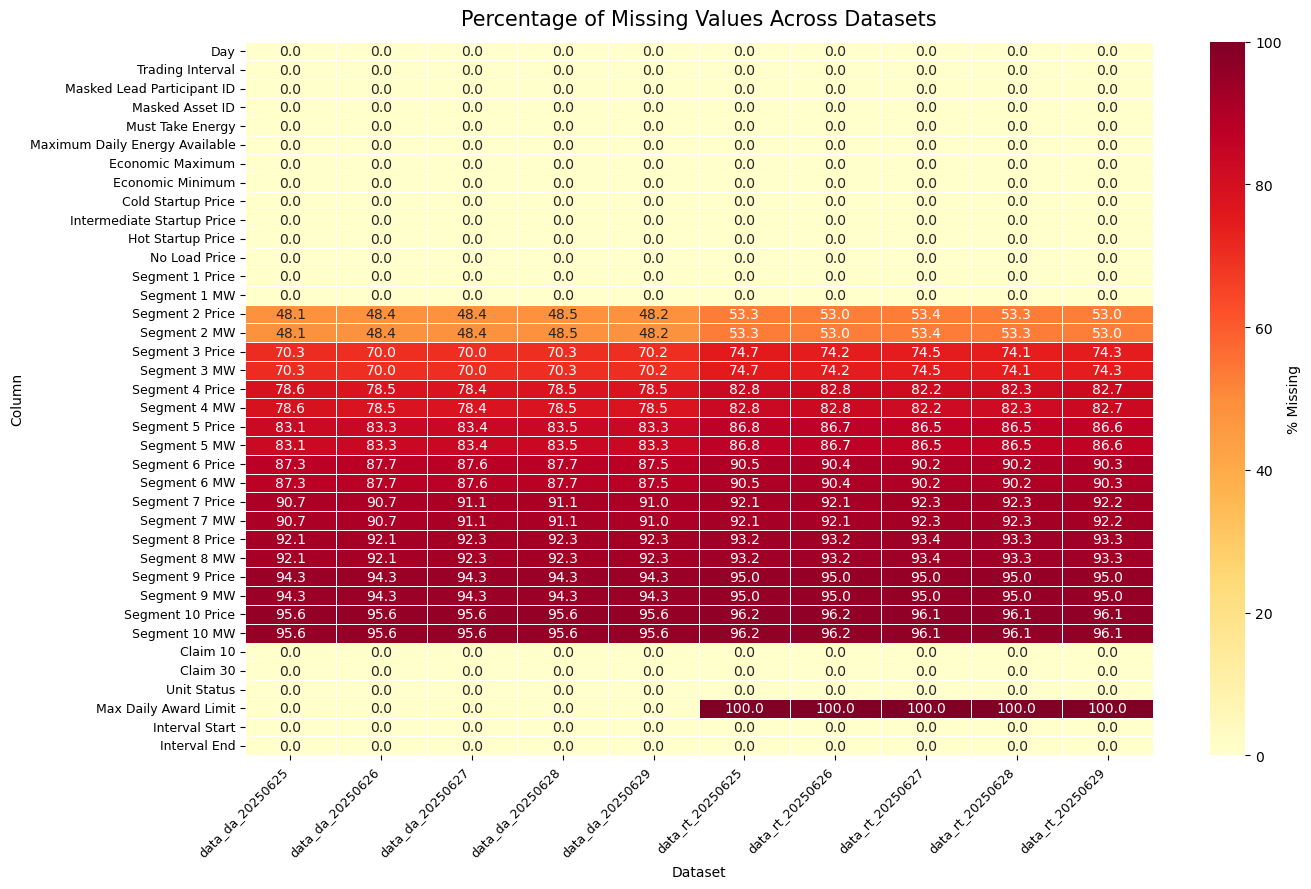

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

missing_matrix = pd.DataFrame()

for name, df in data_dict.items():
    missing_counts_perc = round(100*(df.isnull().sum()/len(df)),2)
    missing_matrix[name] = missing_counts_perc
missing_matrix

plt.figure(figsize=(14, 9))
sns.heatmap(
    missing_matrix,
    cmap="YlOrRd",                # yellow → red gradient
    annot=True,                   # show percentages in cells
    fmt=".1f",                    # one decimal place
    linewidths=0.5,
    cbar_kws={'label': '% Missing'}
);
plt.title("Percentage of Missing Values Across Datasets", fontsize=15, pad=12)
plt.xlabel("Dataset")
plt.ylabel("Column")
plt.xticks(rotation=45, ha="right", fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.show();

We can see from the heatmap that for all the five days, be in the day-ahead market or the real time market, generators stop offering the power generated beyond the second segment. In the real-time data, there are no values in the `Max Daily Award Limit` column. This column, which indicates the maximum load a generator can provide in a day, is redundant for segment-wise study, especially in the context of real-time markets because real markets function in 5-min segments, unlike the day-ahead markets which work in hourly segments. Thus, it is safe to omit this column from our analysis.

In [9]:
#We create a function to omit the desired column from our dataframes.
def remove_col(column_name, data):
    for name, df in data.items():
        if column_name in df.columns:
            data[name] = df.drop(columns=[column_name])
remove_col("Max Daily Award Limit", data_dict)

In [10]:
#Checking whether the function has worked or not
get_data("20250625","da",data_dict).columns

Index(['Day', 'Trading Interval', 'Masked Lead Participant ID',
       'Masked Asset ID', 'Must Take Energy', 'Maximum Daily Energy Available',
       'Economic Maximum', 'Economic Minimum', 'Cold Startup Price',
       'Intermediate Startup Price', 'Hot Startup Price', 'No Load Price',
       'Segment 1 Price', 'Segment 1 MW', 'Segment 2 Price', 'Segment 2 MW',
       'Segment 3 Price', 'Segment 3 MW', 'Segment 4 Price', 'Segment 4 MW',
       'Segment 5 Price', 'Segment 5 MW', 'Segment 6 Price', 'Segment 6 MW',
       'Segment 7 Price', 'Segment 7 MW', 'Segment 8 Price', 'Segment 8 MW',
       'Segment 9 Price', 'Segment 9 MW', 'Segment 10 Price', 'Segment 10 MW',
       'Claim 10', 'Claim 30', 'Unit Status', 'Interval Start',
       'Interval End'],
      dtype='object')

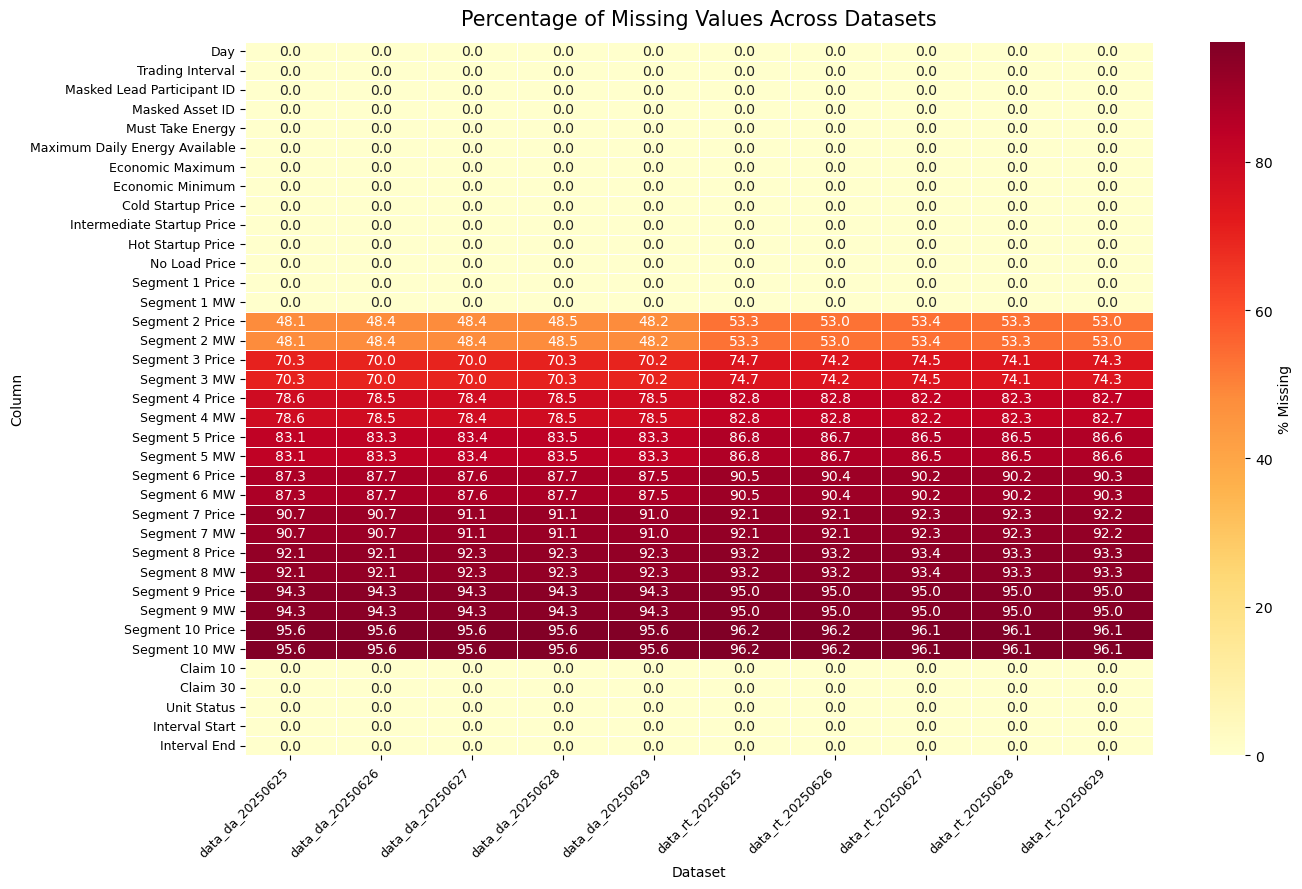

In [11]:
#Revisiting the heatmap
missing_matrix = pd.DataFrame()

for name, df in data_dict.items():
    missing_counts_perc = round(100*(df.isnull().sum()/len(df)),2)
    missing_matrix[name] = missing_counts_perc
missing_matrix

plt.figure(figsize=(14, 9))
sns.heatmap(
    missing_matrix,
    cmap="YlOrRd",                # yellow → red gradient
    annot=True,                   # show percentages in cells
    fmt=".1f",                    # one decimal place
    linewidths=0.5,
    cbar_kws={'label': '% Missing'}
);
plt.title("Percentage of Missing Values Across Datasets", fontsize=15, pad=12)
plt.xlabel("Dataset")
plt.ylabel("Column")
plt.xticks(rotation=45, ha="right", fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.show();

What now concerns is the missing data for the units and prices of the various missing segments. I have used the following strategy to extrapolate expected unit and their prices for the missing segments.

1. No treatment has been initiated for those generating assets that had extinguished all the economic offers in all the 10 segments.
2. If some segments were empty, those assets where the difference between the sum total of the offers done in various segment and the economically maximum unit possible is less than 0.1 megawatts were omitted (this includes those assets for which this difference has been negative).
3. After following the previous point, if there is only one segment empty, the difference from the second point is placed in the units offered in that empty segment and its price is predicted using OLS. If there are more than one but less than nine empty segments, then the difference is distributed evenly and the prices are predicted using OLS.
4. If there are nine empty segments, or only one filled segment, only the next segment is filled. The difference from the second part is kept in the `Segment 2 MW` column with its price the same as `Segment 1 Price`.

In [12]:
import re
import numpy as np
import pandas as pd
import statsmodels.api as sm

def fill_offer_segments(data, verbose=True, abs_tol=0.1, min_price_points=2):
    """
    Accepts a single DataFrame or a dict of DataFrames.
    Returns a cleaned DataFrame (if input is a DataFrame) or dict of cleaned DataFrames.
    """

    def _coerce_numeric_columns(df):
        df = df.copy()
        for col in df.columns:
            if df[col].dtype == object:
                df[col] = pd.to_numeric(df[col].astype(str).str.replace(",", ""), errors="coerce")
        return df

    def _process_df(df):
        df = df.copy()
        df = _coerce_numeric_columns(df)

        seg_mw_cols = [f"Segment {i} MW" for i in range(1, 11)]
        seg_price_cols = [f"Segment {i} Price" for i in range(1, 11)]

        for c in seg_mw_cols + seg_price_cols:
            if c not in df.columns:
                df[c] = np.nan

        cleaned_rows = []

        def seg_number(colname):
            m = re.search(r'(\d+)', colname)
            return int(m.group(1)) if m else None

        if "Masked Asset ID" not in df.columns:
            raise ValueError("DataFrame must contain 'Masked Asset ID' column.")

        for asset_id, group in df.groupby("Masked Asset ID"):
            for idx, row in group.iterrows():
                mw_values = row[seg_mw_cols].astype(float)
                price_values = row[seg_price_cols].astype(float)

                missing_mask = mw_values.isna()
                missing_segments = int(missing_mask.sum())

                if missing_segments == 0:
                    cleaned_rows.append(row.to_dict())
                    continue

                eco_max = pd.to_numeric(row.get("Economic Maximum", np.nan), errors="coerce")
                if pd.isna(eco_max):
                    cleaned_rows.append(row.to_dict())
                    continue

                total_mw = mw_values.sum(skipna=True)
                diff = float(eco_max) - float(total_mw)

                # 🔸 CHANGED CONDITION HERE 🔸
                # Omit any asset with diff < abs_tol (includes negative and <0.1 MW)
                if diff < abs_tol:
                    continue

                filled_row = row.copy()
                missing_cols = missing_mask[missing_mask].index.tolist()

                present_mw_pos = (~missing_mask).to_numpy()
                price_present_pos = (~price_values.isna()).to_numpy()

                seg_indices = np.arange(1, 11)
                X_mask = price_present_pos
                X = seg_indices[X_mask]
                y = price_values.to_numpy()[X_mask]

                use_ols = False
                if y.size >= min_price_points:
                    try:
                        X_design = sm.add_constant(X)
                        model = sm.OLS(y, X_design).fit()
                        use_ols = True
                    except Exception:
                        use_ols = False

                def predict_price(seg_num):
                    if use_ols:
                        try:
                            return float(model.predict([1, seg_num])[0])
                        except Exception:
                            return np.nan
                    else:
                        present_prices = price_values.to_numpy()[price_present_pos]
                        return float(np.nanmean(present_prices)) if present_prices.size else np.nan

                if missing_segments == 1:
                    col = missing_cols[0]
                    seg_num = seg_number(col)
                    filled_row[col] = diff
                    filled_row[f"Segment {seg_num} Price"] = predict_price(seg_num)

                elif 2 <= missing_segments <= 8:
                    each_fill = diff / missing_segments
                    for col in missing_cols:
                        seg_num = seg_number(col)
                        filled_row[col] = each_fill
                        filled_row[f"Segment {seg_num} Price"] = predict_price(seg_num)

                elif missing_segments == 9:
                    present_pos_idxs = np.where(~mw_values.isna().to_numpy())[0]
                    if present_pos_idxs.size == 1:
                        present_idx = int(present_pos_idxs[0])
                        present_price = price_values.to_numpy()[present_idx]
                        filled_row["Segment 2 MW"] = diff
                        filled_row["Segment 2 Price"] = (
                            present_price if not pd.isna(present_price) else predict_price(2)
                        )
                    else:
                        each_fill = diff / missing_segments
                        for col in missing_cols:
                            seg_num = seg_number(col)
                            filled_row[col] = each_fill
                            filled_row[f"Segment {seg_num} Price"] = predict_price(seg_num)
                else:
                    cleaned_rows.append(row.to_dict())
                    continue

                cleaned_rows.append(filled_row.to_dict())

        if cleaned_rows:
            cleaned_df = pd.DataFrame(cleaned_rows)[df.columns.tolist()]
        else:
            cleaned_df = pd.DataFrame(columns=df.columns.tolist())

        return cleaned_df

    if isinstance(data, dict):
        cleaned = {}
        for name, df in data.items():
            if verbose:
                print(f"Processing {name} ...")
            cleaned[name] = _process_df(df)
            if verbose:
                print(f"Completed {name}: {len(cleaned[name])} rows")
        return cleaned

    elif isinstance(data, pd.DataFrame):
        return _process_df(data)

    else:
        raise TypeError("Input must be a pandas DataFrame or a dict of DataFrames.")


In [13]:
#Storing the filled data in a new dictionary
filled_data_dict = fill_offer_segments(data_dict)

Processing data_da_20250625 ...
Completed data_da_20250625: 946 rows
Processing data_da_20250626 ...
Completed data_da_20250626: 961 rows
Processing data_da_20250627 ...
Completed data_da_20250627: 969 rows
Processing data_da_20250628 ...
Completed data_da_20250628: 928 rows
Processing data_da_20250629 ...
Completed data_da_20250629: 1013 rows
Processing data_rt_20250625 ...
Completed data_rt_20250625: 1099 rows
Processing data_rt_20250626 ...
Completed data_rt_20250626: 1020 rows
Processing data_rt_20250627 ...
Completed data_rt_20250627: 1042 rows
Processing data_rt_20250628 ...
Completed data_rt_20250628: 1007 rows
Processing data_rt_20250629 ...
Completed data_rt_20250629: 1059 rows


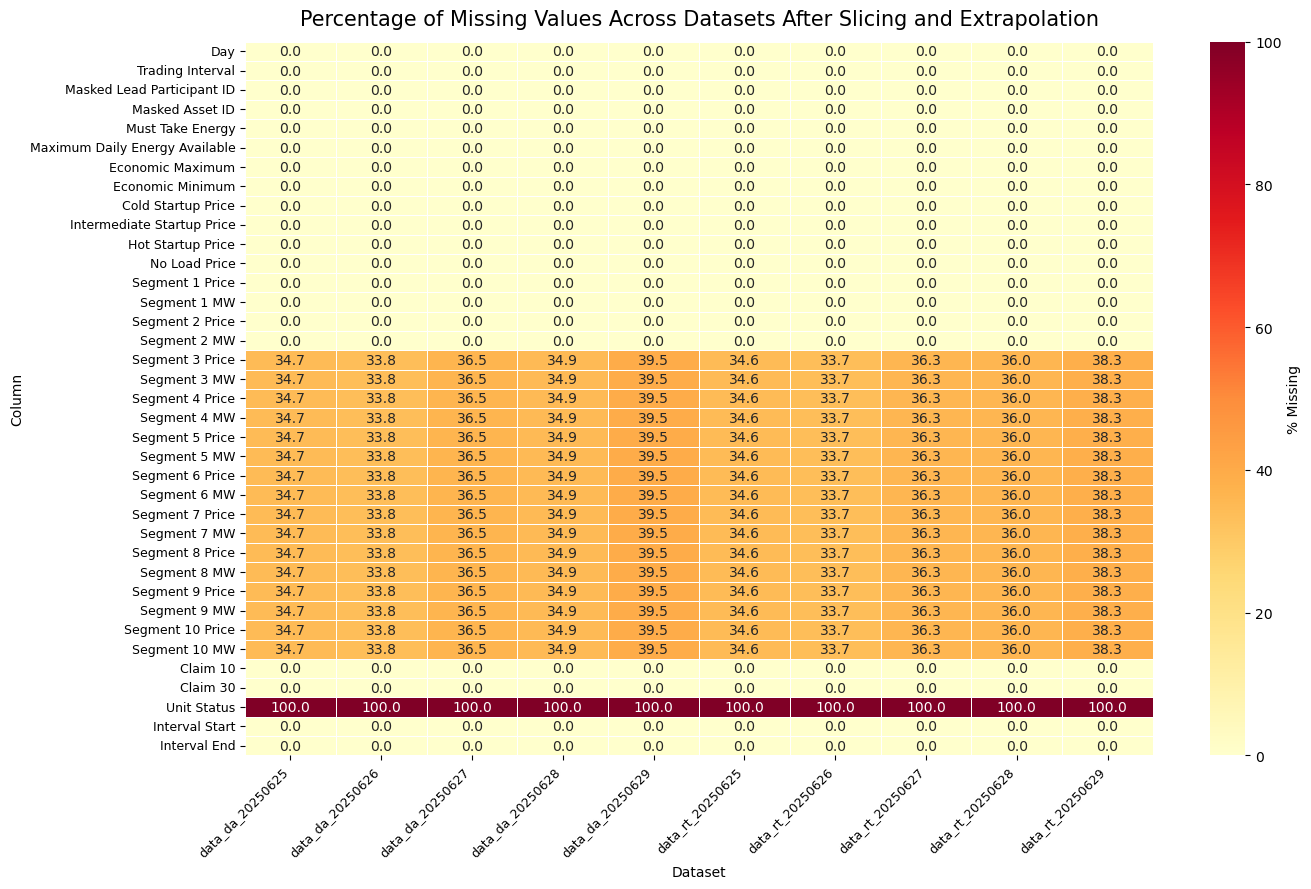

In [14]:
missing_matrix_filled = pd.DataFrame()

for name, df in filled_data_dict.items():
    missing_counts_perc = round(100*(df.isnull().sum()/len(df)),2)
    missing_matrix_filled[name] = missing_counts_perc

plt.figure(figsize=(14, 9))
sns.heatmap(
    missing_matrix_filled,
    cmap="YlOrRd",                # yellow → red gradient
    annot=True,                   # show percentages in cells
    fmt=".1f",                    # one decimal place
    linewidths=0.5,
    cbar_kws={'label': '% Missing'}
);
plt.title("Percentage of Missing Values Across Datasets After Slicing and Extrapolation", fontsize=15, pad=12)
plt.xlabel("Dataset")
plt.ylabel("Column")
plt.xticks(rotation=45, ha="right", fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.show();

The `Unit Status` column has been converted into a null column and this could be removed.

In [15]:
remove_col("Unit Status", filled_data_dict)

#Checking whether Unit Status has been omitted by checking the column names of one of the updated dataframes
get_data("20250625","da",filled_data_dict).columns

Index(['Day', 'Trading Interval', 'Masked Lead Participant ID',
       'Masked Asset ID', 'Must Take Energy', 'Maximum Daily Energy Available',
       'Economic Maximum', 'Economic Minimum', 'Cold Startup Price',
       'Intermediate Startup Price', 'Hot Startup Price', 'No Load Price',
       'Segment 1 Price', 'Segment 1 MW', 'Segment 2 Price', 'Segment 2 MW',
       'Segment 3 Price', 'Segment 3 MW', 'Segment 4 Price', 'Segment 4 MW',
       'Segment 5 Price', 'Segment 5 MW', 'Segment 6 Price', 'Segment 6 MW',
       'Segment 7 Price', 'Segment 7 MW', 'Segment 8 Price', 'Segment 8 MW',
       'Segment 9 Price', 'Segment 9 MW', 'Segment 10 Price', 'Segment 10 MW',
       'Claim 10', 'Claim 30', 'Interval Start', 'Interval End'],
      dtype='object')

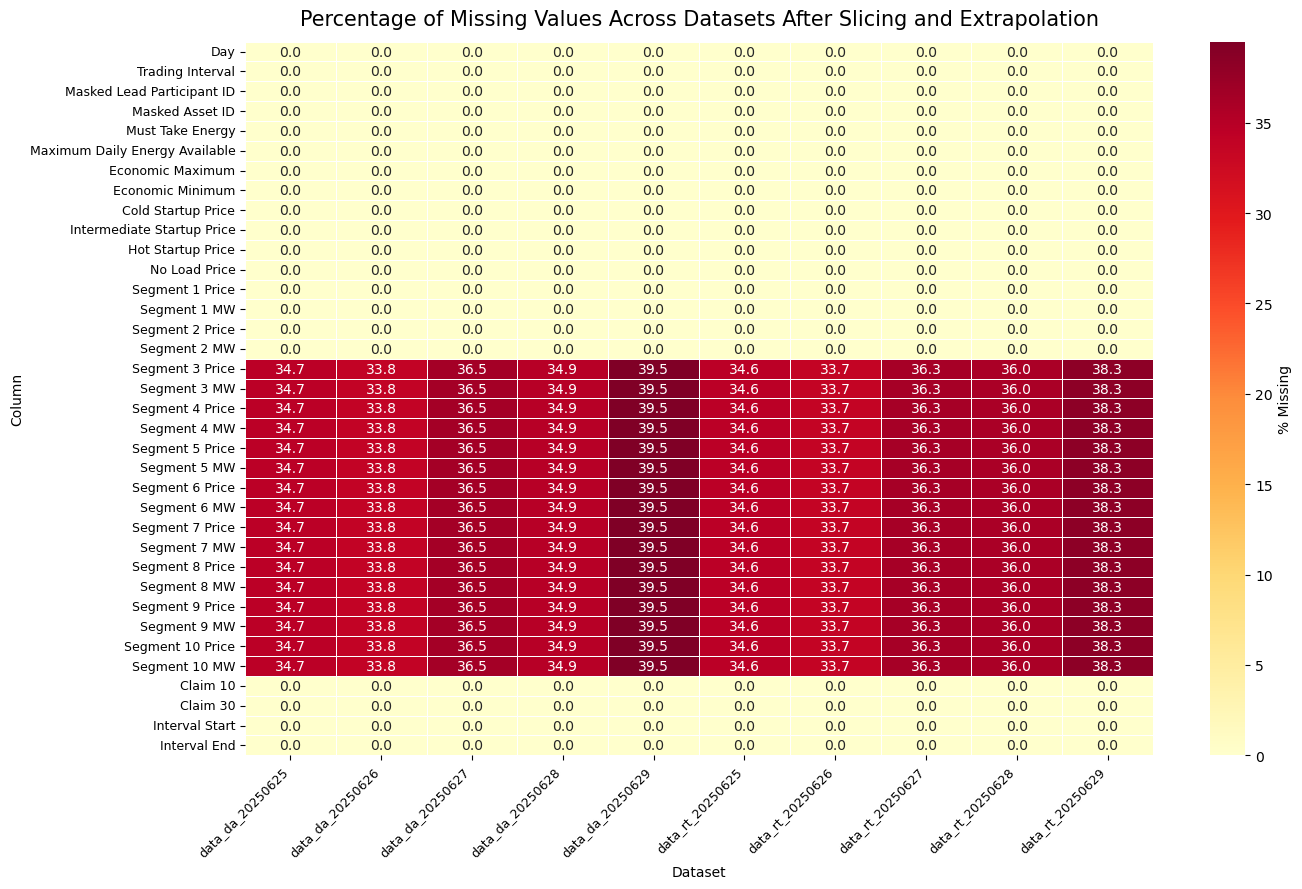

In [16]:
#Revisiting the heatmap
missing_matrix_filled = pd.DataFrame()

for name, df in filled_data_dict.items():
    missing_counts_perc = round(100*(df.isnull().sum()/len(df)),2)
    missing_matrix_filled[name] = missing_counts_perc
missing_matrix_filled

plt.figure(figsize=(14, 9))
sns.heatmap(
    missing_matrix_filled,
    cmap="YlOrRd",                # yellow → red gradient
    annot=True,                   # show percentages in cells
    fmt=".1f",                    # one decimal place
    linewidths=0.5,
    cbar_kws={'label': '% Missing'}
);
plt.title("Percentage of Missing Values Across Datasets After Slicing and Extrapolation", fontsize=15, pad=12)
plt.xlabel("Dataset")
plt.ylabel("Column")
plt.xticks(rotation=45, ha="right", fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.show();

Empty cells still exist because for some generating assets, no offers were made beyond the first segment and due to the lack of data, no reliable predictions could be made for other segments except for the immediate one (we assumed the price would be the same, atleast for the next segment).

## Standardising the column names

We have to make sure that the column names are standardised in a way that it's easier to comprehend and use in codes.

In [17]:
rename_map = {
    'Day':'Date',
    'Trading Interval':'trade_int',
    'Masked Lead Participant ID':'lead_id',
    'Masked Asset ID':'asset_id', 
    'Must Take Energy':'must_take_eng',
    'Maximum Daily Energy Available':'max_eng',
    'Economic Maximum':'eco_max', 
    'Economic Minimum':'eco_min',
    'Cold Startup Price':'cold_price',
    'Intermediate Startup Price':'inter_price',
    'Hot Startup Price':'hot_price',
    'No Load Price':'no_load_price',
    'Segment 1 Price':'seg1_price', 
    'Segment 1 MW':'seg1_mw',
    'Segment 2 Price':'seg2_price',
    'Segment 2 MW':'seg2_mw',
    'Segment 3 Price':'seg3_price',
    'Segment 3 MW':'seg3_mw',
    'Segment 4 Price':'seg4_price',
    'Segment 4 MW':'seg4_mw',
    'Segment 5 Price':'seg5_price',
    'Segment 5 MW':'seg5_mw',
    'Segment 6 Price':'seg6_price',
    'Segment 6 MW':'seg6_mw',
    'Segment 7 Price':'seg7_price',
    'Segment 7 MW':'seg7_mw',
    'Segment 8 Price':'seg8_price',
    'Segment 8 MW':'seg8_mw',
    'Segment 9 Price':'seg9_price',
    'Segment 9 MW':'seg9_mw',
    'Segment 10 Price':'seg10_price',
    'Segment 10 MW':'seg10_mw',
    'Claim 10':'claim10',
    'Claim 30':'claim30',
    'Interval Start':'int_start',
    'Interval End':'int_end'}

for name, df in filled_data_dict.items():
    filled_data_dict[name] = df.rename(columns=rename_map)

In [18]:
#Checking whether the column names have been updated as we wanted
get_data("20250626","rt",filled_data_dict).columns

Index(['Date', 'trade_int', 'lead_id', 'asset_id', 'must_take_eng', 'max_eng',
       'eco_max', 'eco_min', 'cold_price', 'inter_price', 'hot_price',
       'no_load_price', 'seg1_price', 'seg1_mw', 'seg2_price', 'seg2_mw',
       'seg3_price', 'seg3_mw', 'seg4_price', 'seg4_mw', 'seg5_price',
       'seg5_mw', 'seg6_price', 'seg6_mw', 'seg7_price', 'seg7_mw',
       'seg8_price', 'seg8_mw', 'seg9_price', 'seg9_mw', 'seg10_price',
       'seg10_mw', 'claim10', 'claim30', 'int_start', 'int_end'],
      dtype='object')

## 4. Storing the cleaned data

We now have to store the clean data in the `interim` section of `data` folder.

In [24]:
project_root = os.path.dirname(os.getcwd())
interim_base = os.path.join(project_root, "data", "interim")
os.makedirs(interim_base, exist_ok=True)

for name, df in filled_data_dict.items():
    # determine market type per file
    market_type = "da" if "_da_" in name.lower() else "rt"
    
    # ensure subfolder exists
    interim_folder = os.path.join(interim_base, market_type)
    os.makedirs(interim_folder, exist_ok=True)
    
    # file naming
    filename = f"{name}_cleaned_no_neg.csv"
    save_path = os.path.join(interim_folder, filename)
    
    # save file
    df.to_csv(save_path, index=False)
    
    print(f"✅ Saved: {filename} → {save_path}")

✅ Saved: data_da_20250625_cleaned_no_neg.csv → C:\Users\Mitra's\ISO-Ne-Devasya\data\interim\da\data_da_20250625_cleaned_no_neg.csv
✅ Saved: data_da_20250626_cleaned_no_neg.csv → C:\Users\Mitra's\ISO-Ne-Devasya\data\interim\da\data_da_20250626_cleaned_no_neg.csv
✅ Saved: data_da_20250627_cleaned_no_neg.csv → C:\Users\Mitra's\ISO-Ne-Devasya\data\interim\da\data_da_20250627_cleaned_no_neg.csv
✅ Saved: data_da_20250628_cleaned_no_neg.csv → C:\Users\Mitra's\ISO-Ne-Devasya\data\interim\da\data_da_20250628_cleaned_no_neg.csv
✅ Saved: data_da_20250629_cleaned_no_neg.csv → C:\Users\Mitra's\ISO-Ne-Devasya\data\interim\da\data_da_20250629_cleaned_no_neg.csv
✅ Saved: data_rt_20250625_cleaned_no_neg.csv → C:\Users\Mitra's\ISO-Ne-Devasya\data\interim\rt\data_rt_20250625_cleaned_no_neg.csv
✅ Saved: data_rt_20250626_cleaned_no_neg.csv → C:\Users\Mitra's\ISO-Ne-Devasya\data\interim\rt\data_rt_20250626_cleaned_no_neg.csv
✅ Saved: data_rt_20250627_cleaned_no_neg.csv → C:\Users\Mitra's\ISO-Ne-Devasya\data

In [25]:
#Checking the interim folder
os.listdir(interim_folder)

['.ipynb_checkpoints',
 'data_da_20250625_cleaned_no_neg.csv',
 'data_da_20250626_cleaned_no_neg.csv',
 'data_da_20250627_cleaned_no_neg.csv',
 'data_da_20250628_cleaned_no_neg.csv',
 'data_da_20250629_cleaned_no_neg.csv',
 'data_rt_20250625_cleaned.csv',
 'data_rt_20250625_cleaned_no_neg.csv',
 'data_rt_20250626_cleaned.csv',
 'data_rt_20250626_cleaned_no_neg.csv',
 'data_rt_20250627_cleaned.csv',
 'data_rt_20250627_cleaned_no_neg.csv',
 'data_rt_20250628_cleaned.csv',
 'data_rt_20250628_cleaned_no_neg.csv',
 'data_rt_20250629_cleaned.csv',
 'data_rt_20250629_cleaned_no_neg.csv']